In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_excel('train_agriculture.xlsx')
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [5]:
df.shape

(4599, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [7]:
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

ID column is in object type, so we need to covert using LabelEncoder.

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
df['ID']=le.fit_transform(df['ID'])

In [11]:
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,0,188,1,0,1,0,0.0,0,1,0
1,1,209,1,0,1,0,0.0,0,2,1
2,2,257,1,0,1,0,0.0,0,2,1
3,3,257,1,1,1,0,0.0,0,2,1
4,4,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,4594,2138,0,1,2,20,NaN,1,1,1
4595,4595,2139,0,1,2,30,47.0,2,1,1
4596,4596,2267,0,1,2,10,7.0,27,2,0
4597,4597,2267,0,1,2,10,20.0,24,2,0


In [12]:
df.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

We can see some null values in Number_Doses_week column. We can replace it with mean.

In [13]:
df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].mean(),inplace=True)

In [14]:
df.isnull().any()

ID                         False
Estimated_Insects_Count    False
Crop_Type                  False
Soil_Type                  False
Pesticide_Use_Category     False
Number_Doses_Week          False
Number_Weeks_Used          False
Number_Weeks_Quit          False
Season                     False
Crop_Damage                False
dtype: bool

<AxesSubplot:>

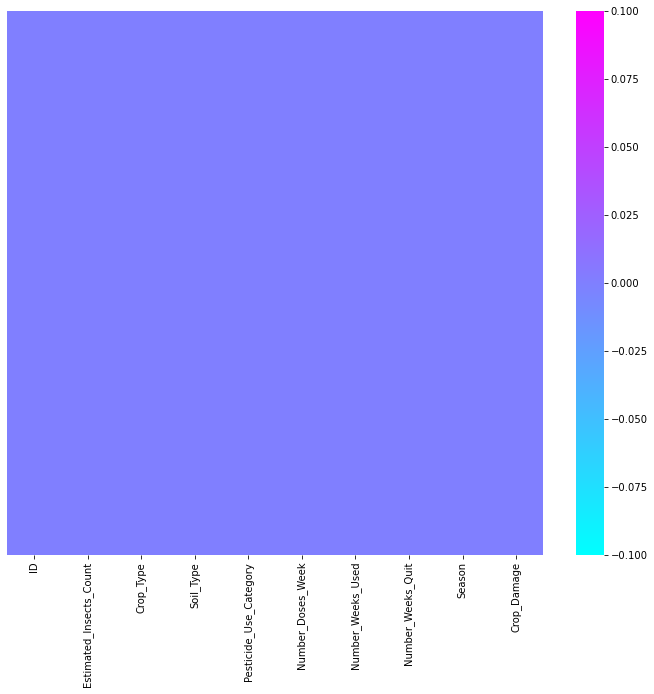

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(),cmap='cool',yticklabels=False)

In [16]:
df['Crop_Type'].value_counts()

0    3565
1    1034
Name: Crop_Type, dtype: int64

In [17]:
df['Soil_Type'].value_counts()

0    2407
1    2192
Name: Soil_Type, dtype: int64

In [18]:
df['Pesticide_Use_Category'].value_counts()

2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64

In [19]:
df['Season'].value_counts()

2    2327
1    1379
3     893
Name: Season, dtype: int64

In [20]:
df['Crop_Damage'].value_counts()

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

In [21]:
df.describe()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,2299.000000,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,1327.761274,814.439120,0.417517,0.499508,0.471978,15.524647,11.965785,9.713253,0.694952,0.454597
min,0.000000,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1149.500000,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,2299.000000,1212.000000,0.000000,0.000000,2.000000,20.000000,28.891027,7.000000,2.000000,0.000000
75%,3448.500000,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4598.000000,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [22]:
df.corr()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
ID,1.000000,0.055384,-0.124446,0.126621,-0.296851,0.031224,-0.096131,0.244521,-0.019987,-0.092715
Estimated_Insects_Count,0.055384,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.427904,0.246719,-0.009482,0.202312
Crop_Type,-0.124446,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002128,-0.273475,-0.000549,0.021772
Soil_Type,0.126621,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.093539,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.296851,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.368106,-0.569467,0.008487,0.199195
Number_Doses_Week,0.031224,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.099705,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,-0.096131,0.427904,-0.002128,-0.093539,0.368106,0.099705,1.000000,-0.446200,-0.010590,0.231925
Number_Weeks_Quit,0.244521,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.446200,1.000000,0.004861,-0.152918
Season,-0.019987,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.010590,0.004861,1.000000,-0.016196
Crop_Damage,-0.092715,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.231925,-0.152918,-0.016196,1.000000


<AxesSubplot:>

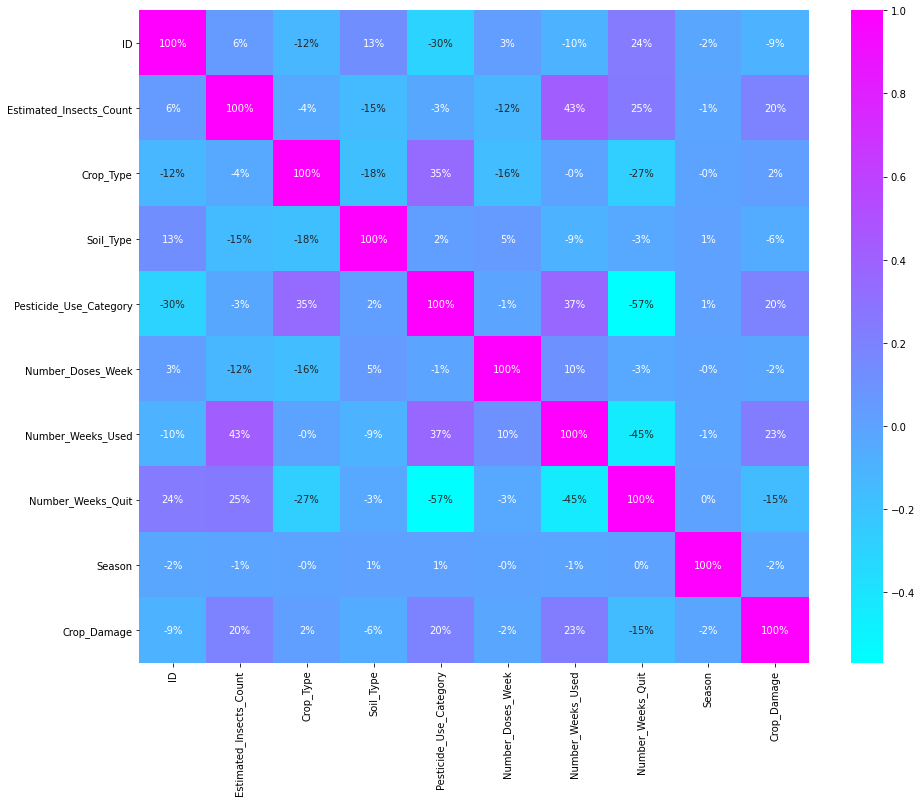

In [23]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),cmap='cool',annot=True,fmt='0.0%')

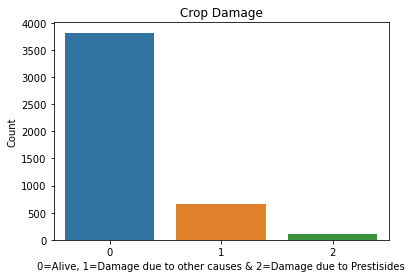

In [24]:
plt.subplots(figsize=(6,4))
sns.countplot(x='Crop_Damage',data=df)
plt.title('Crop Damage')
plt.xlabel('0=Alive, 1=Damage due to other causes & 2=Damage due to Prestisides')
plt.ylabel('Count')
plt.show()

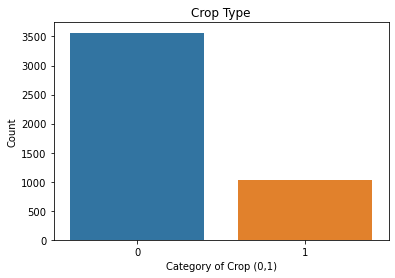

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

In [25]:
sns.countplot(x='Crop_Type',data=df)
plt.title('Crop Type')
plt.xlabel('Category of Crop (0,1)')
plt.ylabel('Count')
plt.show()

df['Crop_Damage'].value_counts()

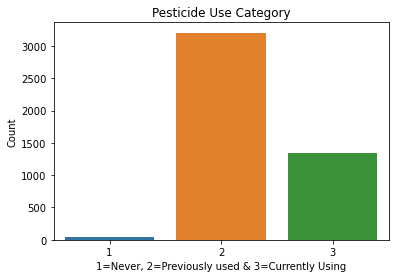

2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64

In [26]:
plt.subplots(figsize=(6,4))
sns.countplot(x='Pesticide_Use_Category',data=df)
plt.title('Pesticide Use Category')
plt.xlabel('1=Never, 2=Previously used & 3=Currently Using')
plt.ylabel('Count')
plt.show()

df['Pesticide_Use_Category'].value_counts()

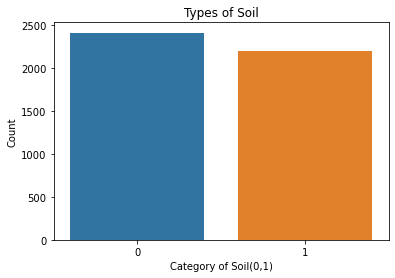

0    2407
1    2192
Name: Soil_Type, dtype: int64

In [27]:
plt.subplots(figsize=(6,4))
sns.countplot(x='Soil_Type',data=df)
plt.title('Types of Soil')
plt.xlabel('Category of Soil(0,1)')
plt.ylabel('Count')
plt.show()

df['Soil_Type'].value_counts()

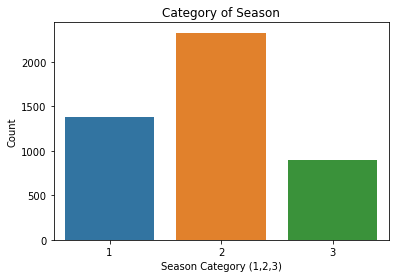

2    2327
1    1379
3     893
Name: Season, dtype: int64

In [28]:
plt.subplots(figsize=(6,4))
sns.countplot(x='Season',data=df)
plt.title('Category of Season')
plt.xlabel('Season Category (1,2,3)')
plt.ylabel('Count')
plt.show()

df['Season'].value_counts()

<Figure size 576x288 with 0 Axes>

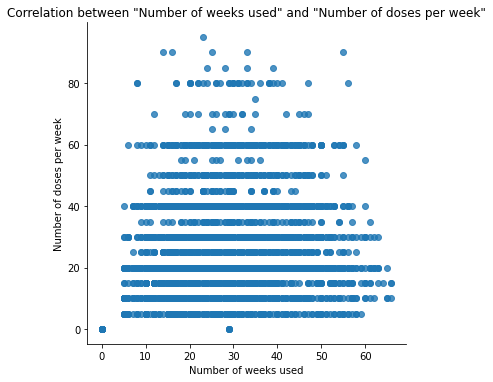

In [29]:
plt.figure(figsize=(8,4))
sns.lmplot(x='Number_Weeks_Used',y='Number_Doses_Week',fit_reg=False,data=df)
plt.xlabel('Number of weeks used')
plt.title('Correlation between "Number of weeks used" and "Number of doses per week"')
plt.ylabel('Number of doses per week')
plt.show()

<Figure size 576x288 with 0 Axes>

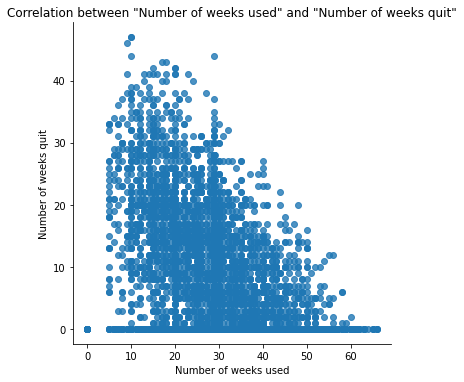

In [30]:
plt.figure(figsize=(8,4))
sns.lmplot(x='Number_Weeks_Used',y='Number_Weeks_Quit',fit_reg=False,data=df)
plt.xlabel('Number of weeks used')
plt.title('Correlation between "Number of weeks used" and "Number of weeks quit"')
plt.ylabel('Number of weeks quit')
plt.show()

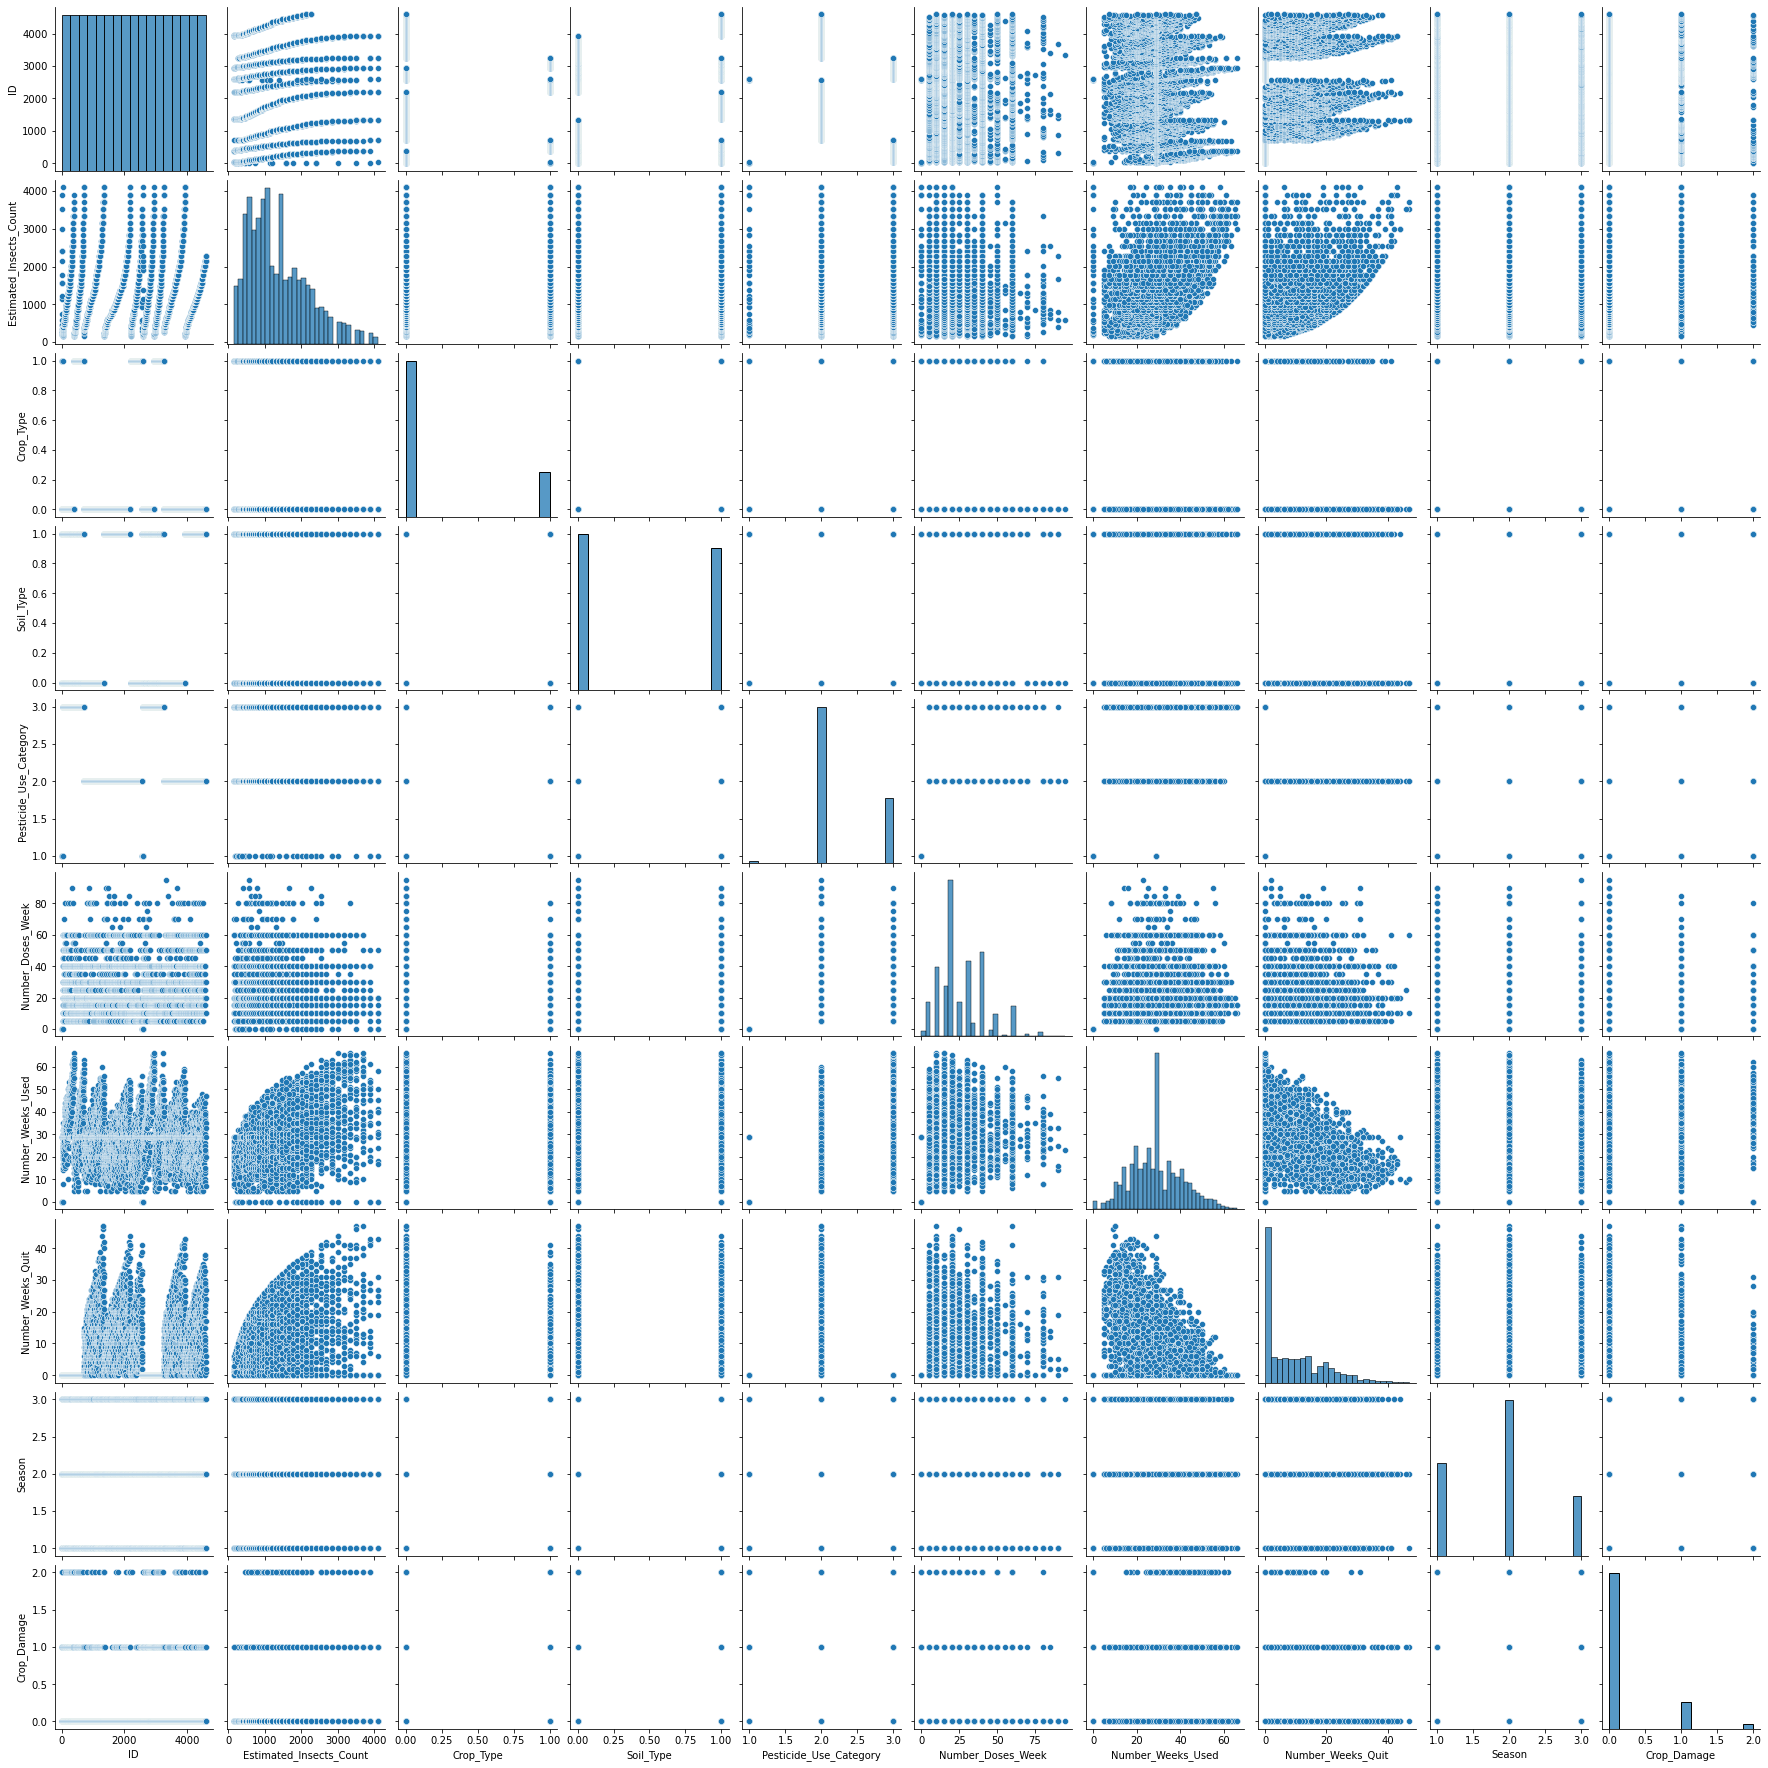

In [31]:
sns.pairplot(df)

In [32]:
df.skew()

ID                         0.000000
Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.278664
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

In [33]:
df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df[col].skew()>0.55:
            df[col]=np.sqrt(df[col])

In [34]:
df.skew()

ID                         0.000000
Estimated_Insects_Count    0.257248
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.494443
Number_Doses_Week         -0.002742
Number_Weeks_Used          0.278664
Number_Weeks_Quit          0.054299
Season                     0.144841
Crop_Damage                1.868685
dtype: float64

ID                             AxesSubplot(0.125,0.71587;0.227941x0.16413)
Estimated_Insects_Count     AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Crop_Type                   AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Soil_Type                     AxesSubplot(0.125,0.518913;0.227941x0.16413)
Pesticide_Use_Category     AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Number_Doses_Week          AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Number_Weeks_Used             AxesSubplot(0.125,0.321957;0.227941x0.16413)
Number_Weeks_Quit          AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Season                     AxesSubplot(0.672059,0.321957;0.227941x0.16413)
Crop_Damage                      AxesSubplot(0.125,0.125;0.227941x0.16413)
dtype: object

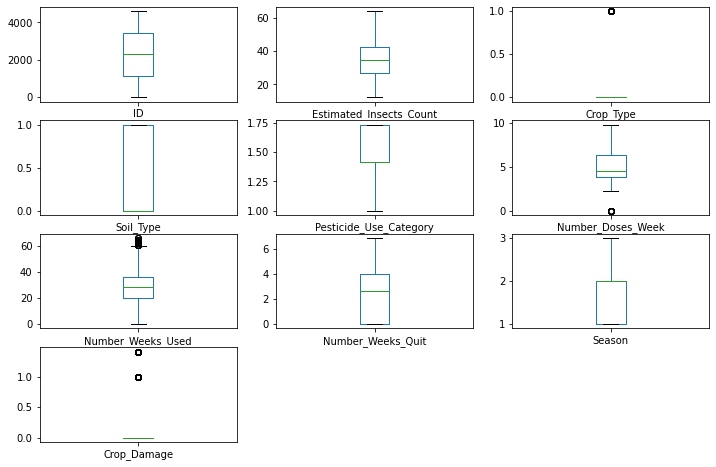

In [35]:
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(12,8))

Observation:

To remove the outliwers from the dataset we r using z-score threshold value

In [36]:
from scipy.stats import zscore

In [37]:
z=np.abs(zscore(df))
z

array([[1.73167423, 1.97255279, 1.85681868, ..., 1.21243919, 1.28702725,
        0.44645909],
       [1.730921  , 1.90432337, 1.85681868, ..., 1.21243919, 0.15207762,
        2.03742611],
       [1.73016778, 1.76023723, 1.85681868, ..., 1.21243919, 0.15207762,
        2.03742611],
       ...,
       [1.73016778, 1.13009366, 0.53855555, ..., 1.47914473, 0.15207762,
        0.44645909],
       [1.730921  , 1.13009366, 0.53855555, ..., 1.32521046, 0.15207762,
        0.44645909],
       [1.73167423, 1.13009366, 0.53855555, ..., 0.92331125, 0.15207762,
        0.44645909]])

In [38]:
threshold=3
print(np.where(z>3))

(array([   0,    0,    1,    1,    2,    2,    3,    3,    4,    4,    5,
          5,    6,    6,    7,    7,    7,    8,    8,    9,    9,    9,
         10,   10,   11,   11,   12,   12,   13,   13,   14,   14,   14,
         15,   15,   16,   16,   17,   17,   18,   18,   19,   19,   20,
         20,   21,   21,   22,   22,   23,   23,  103,  112,  149,  165,
        166,  167,  179,  186,  197,  207,  222,  223,  242,  248,  264,
        265,  290,  296,  305,  316,  351,  355,  361,  374,  375,  377,
        453,  458,  466,  480,  510,  517,  522,  557,  595,  612,  634,
        693,  819,  944,  980, 1067, 1178, 1327, 1339, 1340, 1737, 1807,
       2043, 2139, 2170, 2171, 2237, 2571, 2571, 2572, 2572, 2573, 2573,
       2574, 2574, 2575, 2575, 2576, 2576, 2577, 2577, 2578, 2578, 2579,
       2579, 2580, 2580, 2581, 2581, 2582, 2582, 2583, 2583, 2584, 2584,
       2585, 2585, 2585, 2586, 2586, 2587, 2587, 2588, 2588, 2589, 2589,
       2590, 2590, 2590, 2591, 2591, 2663, 2671, 2

In [39]:
df.shape

(4599, 10)

In [40]:
df=df[(z<3).all(axis=1)]

In [41]:
df.shape

(4437, 10)

In [42]:
x=df.drop('Crop_Damage',axis=1)
y=df['Crop_Damage']

In [43]:
x.shape

(4437, 9)

In [44]:
y.shape

(4437,)

In [45]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42,stratify=y)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV,cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [48]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('****************************************')
    print('\n')

Accuracy score of LogisticRegression() is:
0.8524774774774775
[[750  12]
 [119   7]]
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92       762
         1.0       0.37      0.06      0.10       126

    accuracy                           0.85       888
   macro avg       0.62      0.52      0.51       888
weighted avg       0.79      0.85      0.80       888

****************************************


Accuracy score of GaussianNB() is:
0.8288288288288288
[[696  66]
 [ 86  40]]
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90       762
         1.0       0.38      0.32      0.34       126

    accuracy                           0.83       888
   macro avg       0.63      0.62      0.62       888
weighted avg       0.82      0.83      0.82       888

****************************************


Accuracy score of SVC() is:
0.8513513513513513
[[755   7]
 [125   1]]
              precision    r

In [49]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier()]

for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='accuracy')
    print('model:',m)
    print('score:',score)
    print('Mean score',score.mean())
    print('standard deviation:',score.std())
    print('**********************')
    print('\n')

model: LogisticRegression()
score: [0.73423423 0.86936937 0.85585586 0.85810811 0.85810811 0.85810811
 0.72072072 0.86004515 0.86455982 0.85778781]
Mean score 0.8336897281028207
standard deviation: 0.05332431523632914
**********************


model: GaussianNB()
score: [0.31981982 0.80855856 0.86261261 0.85810811 0.85810811 0.83558559
 0.49324324 0.86681716 0.86230248 0.86230248]
Mean score 0.7627458157932198
standard deviation: 0.18303953902953313
**********************


model: SVC()
score: [0.20945946 0.72522523 0.45720721 0.85810811 0.74324324 0.84684685
 0.33783784 0.86004515 0.7765237  0.85778781]
Mean score 0.667228458707014
standard deviation: 0.22922387181140383
**********************


model: DecisionTreeClassifier()
score: [0.1463964  0.09009009 0.24774775 0.13738739 0.7454955  0.77927928
 0.23423423 0.25056433 0.26185102 0.18284424]
Mean score 0.3075890224310089
standard deviation: 0.23374733487727978
**********************


model: KNeighborsClassifier()
score: [0.34234234

In [50]:
parameters={'C':[1,10],'random_state':range(42,100)}
lg=LogisticRegression()
clf=GridSearchCV(lg,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 1, 'random_state': 42}


In [51]:
lr=LogisticRegression(C=1,random_state=42)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8524774774774775
[[750  12]
 [119   7]]
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92       762
         1.0       0.37      0.06      0.10       126

    accuracy                           0.85       888
   macro avg       0.62      0.52      0.51       888
weighted avg       0.79      0.85      0.80       888



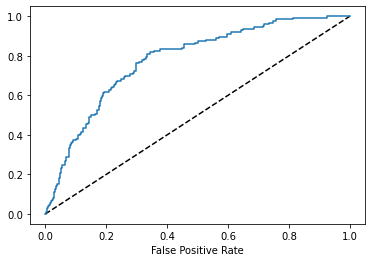

0.5199037620297463


In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=lr.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False Positive Rate')
plt.show()

auc_score=roc_auc_score(y_test,predlr)
print(auc_score)

In [53]:
import pickle

In [54]:
filename='Agriculture_data.pkl'
pickle.dump(lr,open(filename,'wb'))